# Práctica 2
## Airline Dataset
<style>
    div{
        width: 100%;
        height:300px;
        position: relative;
        z-index: -2;
        overflow: hidden;
    }
    img{
        position: absolute;
        top: -90px;
        width: 100%;

    }
</style>
<div><img src="./img/dataset-cover.png"></div>

#### Contexto del Dataset

Los datos de las aerolíneas tienen una importancia inmensa, ya que ofrecen información sobre el funcionamiento y la eficiencia del sector de la aviación. Proporcionan información valiosa sobre rutas de vuelo, horarios, demografía de los pasajeros y preferencias, que las aerolíneas pueden aprovechar para optimizar sus operaciones y mejorar la experiencia de los clientes. Al analizar los datos sobre retrasos, cancelaciones y puntualidad, las aerolíneas pueden identificar tendencias y aplicar estrategias para mejorar la puntualidad y mitigar las interrupciones. Además, los organismos reguladores y los responsables políticos confían en estos datos para garantizar las normas de seguridad, hacer cumplir los reglamentos y tomar decisiones informadas sobre las políticas de aviación. Los investigadores y analistas utilizan los datos de las aerolíneas para estudiar las tendencias del mercado, evaluar el impacto medioambiental y desarrollar estrategias de crecimiento sostenible dentro del sector. En esencia, los datos de las aerolíneas sirven de base para la toma de decisiones informadas, la eficiencia operativa y el avance general del sector de la aviación.

#### Importando datos

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil.parser import parse
from datetime import datetime as dt
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2

In [2]:
df = pd.read_csv(f"Airline Dataset Updated - v2.csv")
df

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Ebonee Tree,On Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98614,hnGQ62,Gareth,Mugford,Male,85,China,Hasvik Airport,NO,Norway,EU,Europe,12-11-2022,HAA,Pammie Kingscote,Cancelled
98615,2omEzh,Kasey,Benedict,Female,19,Russia,Ampampamena Airport,MG,Madagascar,AF,Africa,10/30/2022,IVA,Dorice Lochran,Cancelled
98616,VUPiVG,Darrin,Lucken,Male,65,Indonesia,Albacete-Los Llanos Airport,ES,Spain,EU,Europe,09-10-2022,ABC,Gearalt Main,On Time
98617,E47NtS,Gayle,Lievesley,Female,34,China,Gagnoa Airport,CI,Côte d'Ivoire,AF,Africa,10/26/2022,GGN,Judon Chasle,Cancelled


## Análisis exploratorio

Observamos la información del DataFrames con el objetivo de observar los tipos de datos que contiene y sus entradas

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  object
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(1), object(14)
memory usage

En la siguiente celda se puede apreciar que solo el elemento *Age* es posible manipularse de forma accesible, ya que es de tipo entero. Por lo que será indispensable utilizar la serie de visualizaciones que contiene *seaborn* para datos categóricos.

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

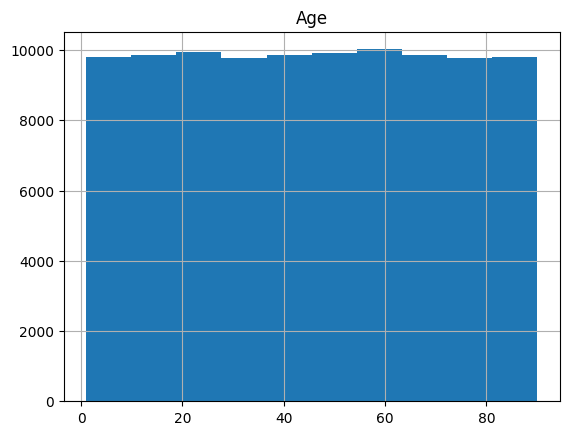

In [4]:
df.hist()

In [5]:
df.describe()

,Age
count,98619.000000
mean,45.504021
std,25.929849
min,1.000000
25%,23.000000
50%,46.000000
75%,68.000000
max,90.000000


c:\Users\spoon\Documents\GitHub\ICD-Portfolio\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\spoon\Documents\GitHub\ICD-Portfolio\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\spoon\Documents\GitHub\ICD-Portfolio\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Age', ylabel='count'>

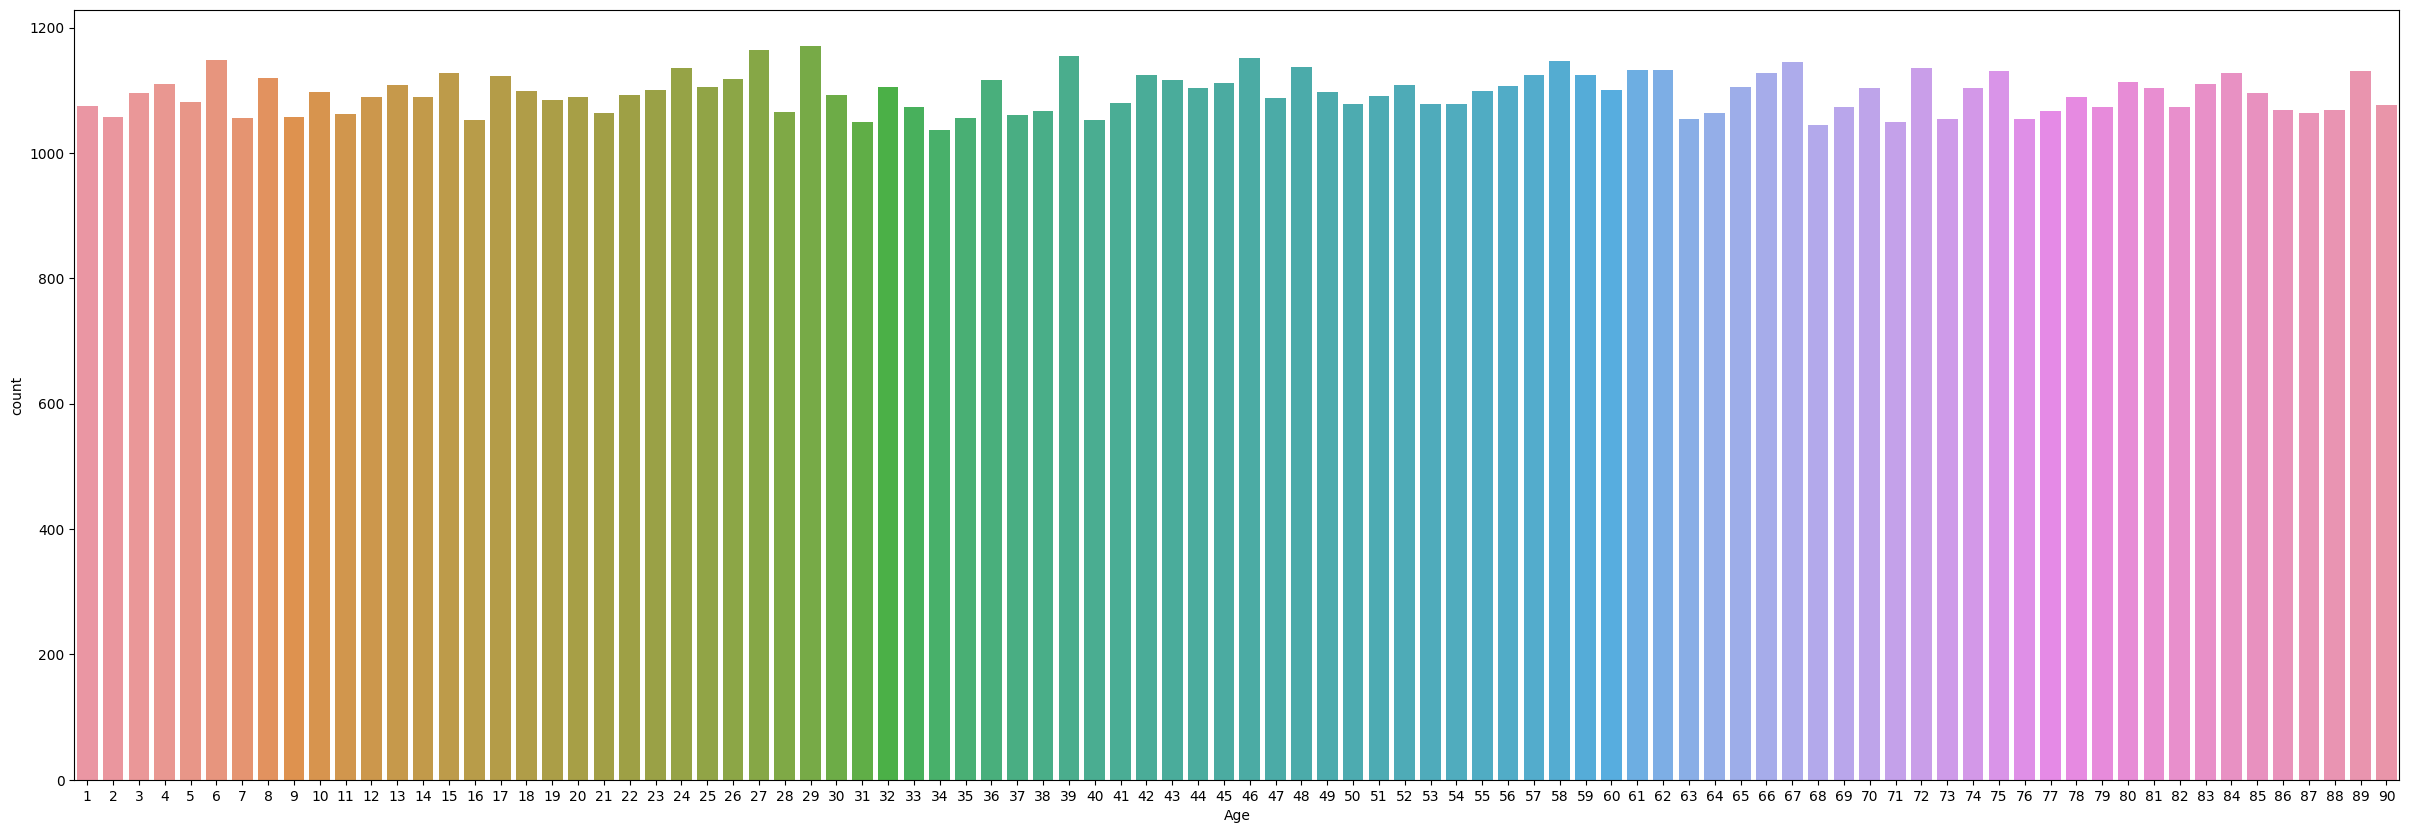

In [6]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(30)
sns.countplot(data=df, x="Age", ax=ax)

A continuación se puede observar el conteo de los aeropuertos de los paises, notando que la moda es el aeropuerto de Estados Unidos

c:\Users\spoon\Documents\GitHub\ICD-Portfolio\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\spoon\Documents\GitHub\ICD-Portfolio\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\spoon\Documents\GitHub\ICD-Portfolio\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Airport Country Code', ylabel='count'>

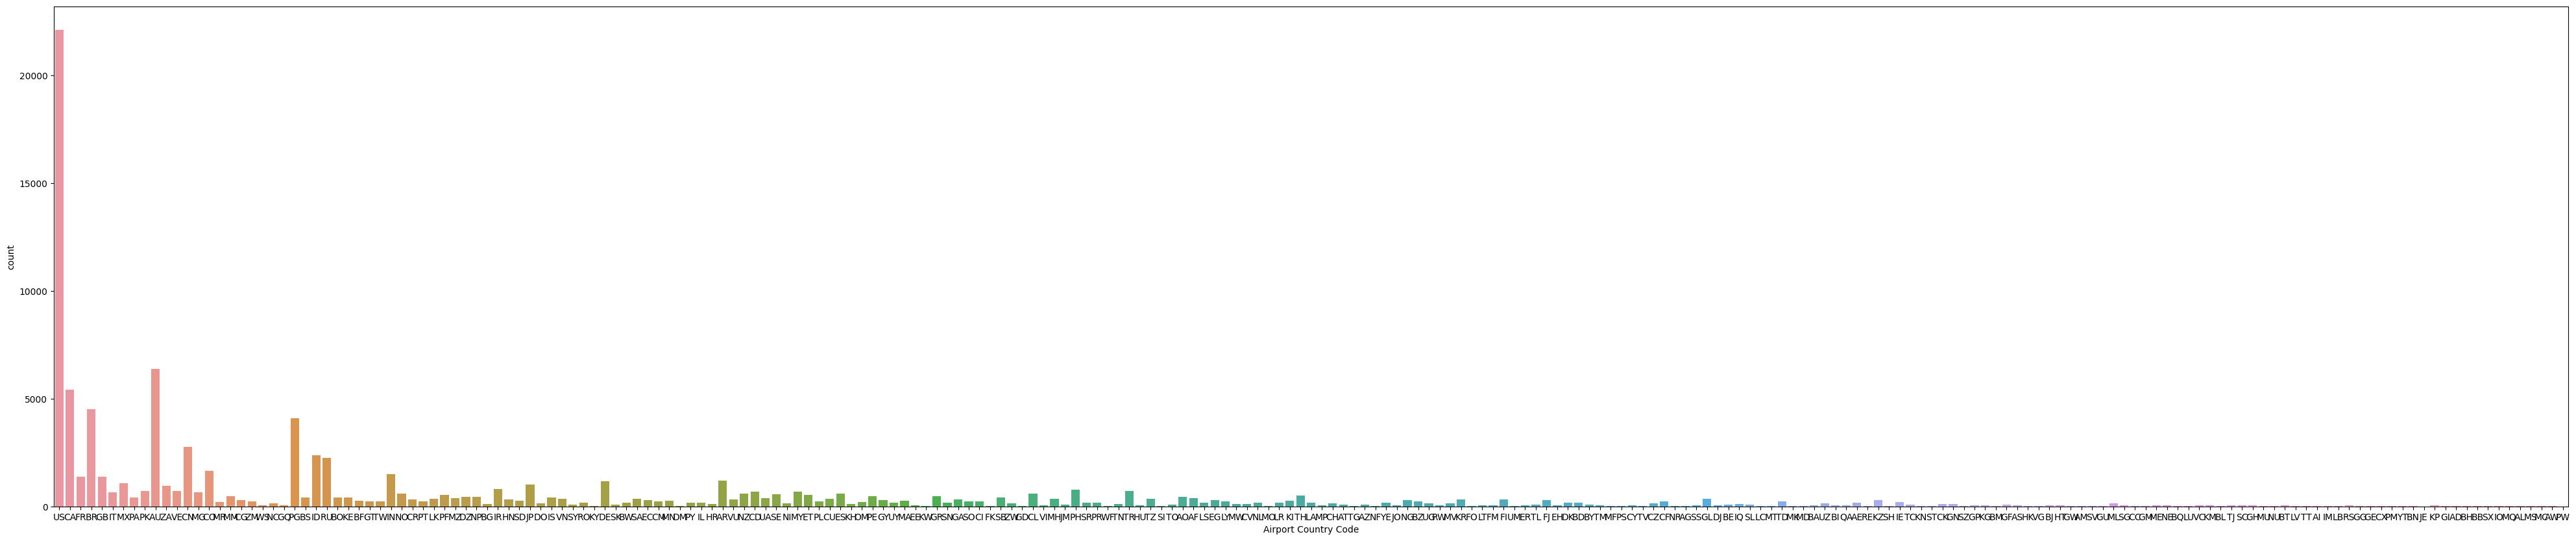

In [7]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(50)
sns.countplot(data=df, x="Airport Country Code", ax=ax)

In [8]:
df['Airport Country Code'].mode()

0    US
Name: Airport Country Code, dtype: object

Se realizó un conteo de los continentes, en donde el continente más frecuente fue el continente norteamericano.

c:\Users\spoon\Documents\GitHub\ICD-Portfolio\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\spoon\Documents\GitHub\ICD-Portfolio\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\spoon\Documents\GitHub\ICD-Portfolio\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Airport Continent', ylabel='count'>

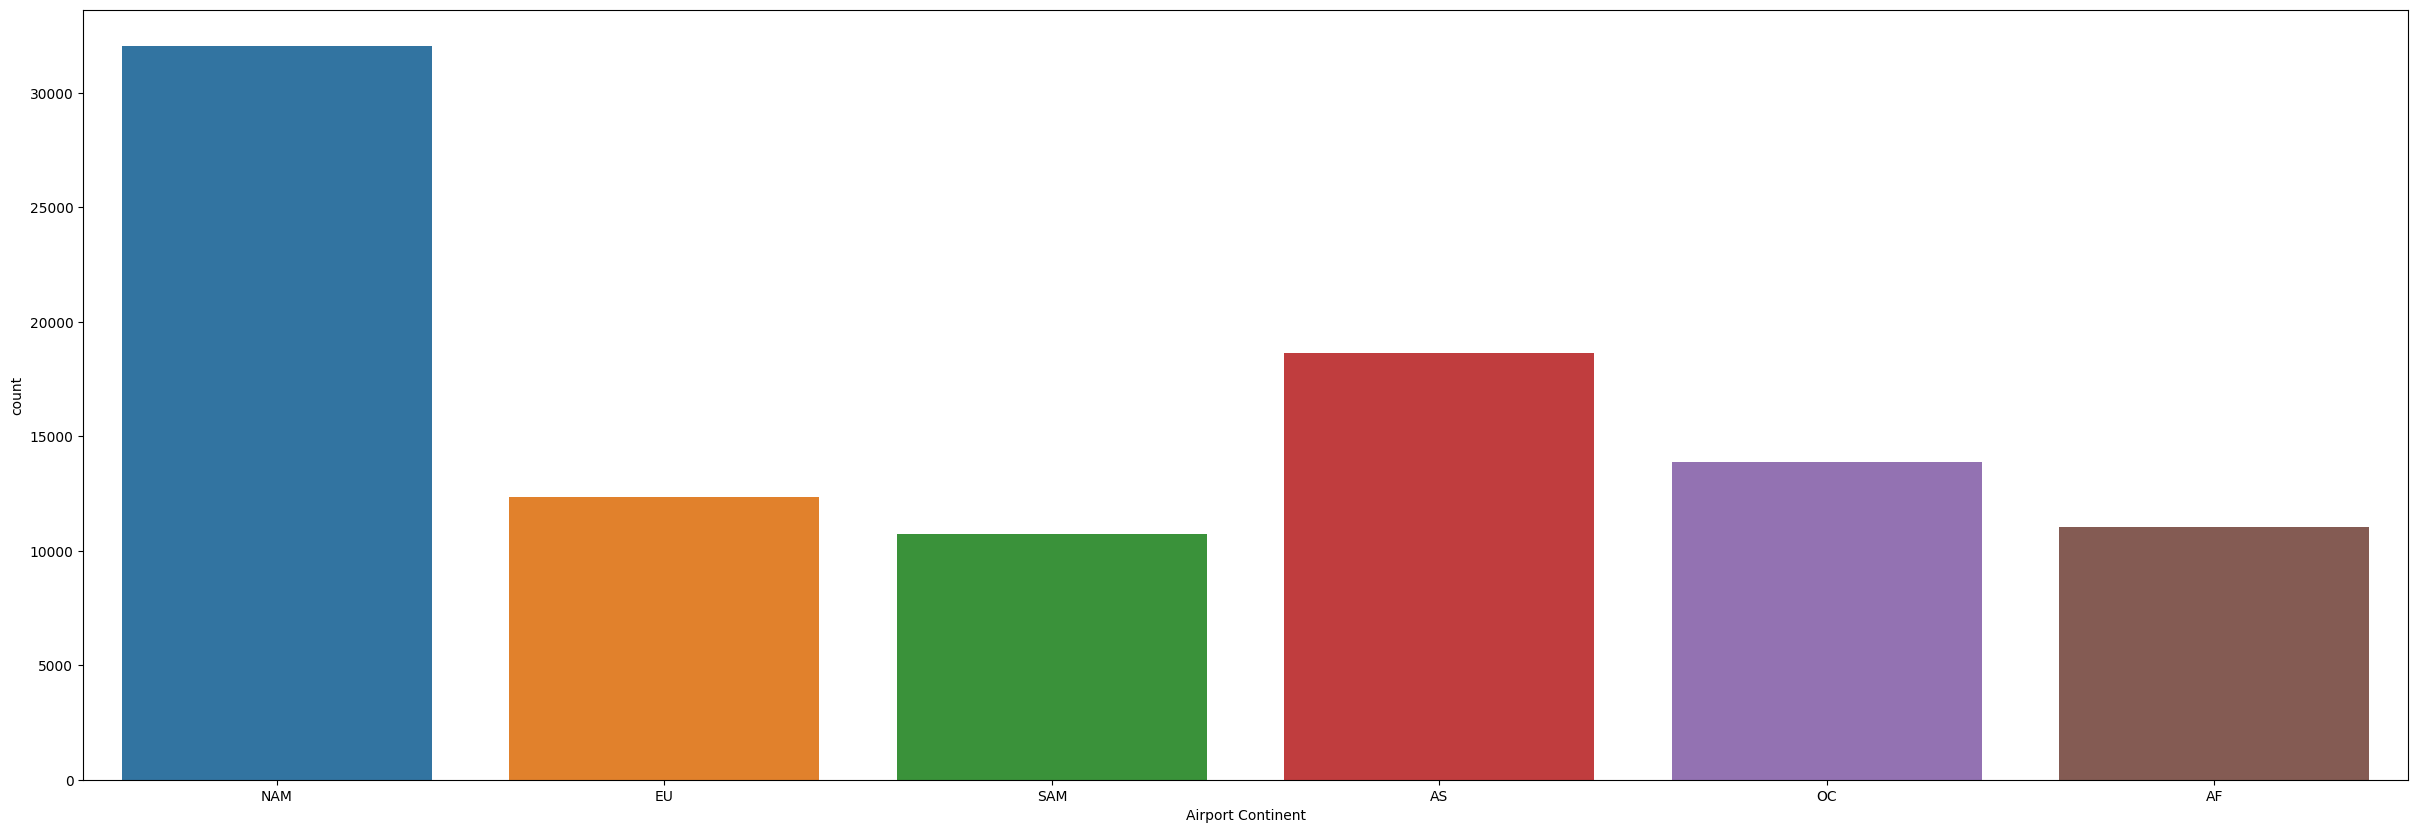

In [9]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(30)
sns.countplot(data=df, x="Airport Continent", ax=ax)

## Limpieza de datos

### Estandarizaión

Los elementos cuentan con una notación *Camel case* y la transformaremos a *Snake case* con el objetivo de guardar una semántica más limpia a la hora de acceder a las columnas de los dataframes.

In [10]:
df.columns = df.columns.str.lower()
df.columns = df.columns.map(lambda x: x.replace("-", "_").replace(" ", "_"))
df.columns

Index(['passenger_id', 'first_name', 'last_name', 'gender', 'age',
       'nationality', 'airport_name', 'airport_country_code', 'country_name',
       'airport_continent', 'continents', 'departure_date', 'arrival_airport',
       'pilot_name', 'flight_status'],
      dtype='object')

Las fechas no cuentan con un formato en específico, por lo que parte de la limpieza de datos es estandarizar un formato. De esta manera se decidió trabajar con el formato clásico *yyyy-MM-dd*

In [11]:
df["departure_date"] = df["departure_date"].apply(lambda x: parse(x))
df['departure_date']

0       2022-06-28
1       2022-12-26
2       2022-01-18
3       2022-09-16
4       2022-02-25
           ...    
98614   2022-12-11
98615   2022-10-30
98616   2022-09-10
98617   2022-10-26
98618   2022-04-16
Name: departure_date, Length: 98619, dtype: datetime64[ns]

### Cambio de tipo de dato

Cambiamos el tipo de datos de los atributos que son del tipo categórico y que actualmente cuentan con el tipo *object*.

In [14]:
for col in df.iloc[:, 4:]:
    if df[col].dtype == 'object':
        df[col] = df[col].astype("category")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   passenger_id          98619 non-null  object        
 1   departure_date        98619 non-null  datetime64[ns]
 2   first_name            98619 non-null  object        
 3   last_name             98619 non-null  object        
 4   age                   98619 non-null  int64         
 5   gender                98619 non-null  category      
 6   nationality           98619 non-null  category      
 7   airport_name          98619 non-null  category      
 8   airport_country_code  98619 non-null  category      
 9   country_name          98619 non-null  category      
 10  airport_continent     98619 non-null  category      
 11  continents            98619 non-null  category      
 12  arrival_airport       98619 non-null  category      
 13  pilot_name      

De igual manera cambiamos el índice de tal modo que los datos de tipo categórico estuviesen agrupados o seguidos para más adelante poder realizar cortes más sencillos al DataFrame.

In [13]:
df = df.reindex(columns=["passenger_id", "departure_date", "first_name", "last_name", "age", "gender","nationality","airport_name","airport_country_code","country_name","airport_continent","continents","arrival_airport", "pilot_name","flight_status"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   passenger_id          98619 non-null  object        
 1   departure_date        98619 non-null  datetime64[ns]
 2   first_name            98619 non-null  object        
 3   last_name             98619 non-null  object        
 4   age                   98619 non-null  int64         
 5   gender                98619 non-null  object        
 6   nationality           98619 non-null  object        
 7   airport_name          98619 non-null  object        
 8   airport_country_code  98619 non-null  object        
 9   country_name          98619 non-null  object        
 10  airport_continent     98619 non-null  object        
 11  continents            98619 non-null  object        
 12  arrival_airport       98619 non-null  object        
 13  pilot_name      

## Extracción de caracteristicas

Debido a que los datos categóricos resultan muy procesados y complejos de procesar, se aplicó una técnica de extracción de características al DataFrame específicamente en los tipos de datos categóricos. Donde realizamos un corte al dataframe a partir del atributo número 5.

In [15]:
encoder = OneHotEncoder()
df_encoded = encoder.fit_transform(df.iloc[:,5:])
columnas = []
for i in encoder.categories_:
    for j in i:
        columnas.append(j)
df_encoded = pd.DataFrame.sparse.from_spmatrix(df_encoded, columns=columnas)

A continuación se definen las etiquetas y los atributos del conjunto de datos.

In [16]:
X = df_encoded.iloc[:,:-3]
y = df_encoded.iloc[:,-3:]

## Selección de Atributos

Utilizando *Chi Square Test* y el método *SelectKBest* para seleccionar los atributos que mejor se relacionan con mis etiquetas

In [17]:
X= X.rename(str,axis="columns") 
chi2_selector = SelectKBest(chi2, k=2)
X_kbest = chi2_selector.fit_transform(X, y)
print(X_kbest)

  (5894, 0)	1.0
  (5894, 1)	1.0
  (12225, 0)	1.0
  (12225, 1)	1.0
  (16548, 0)	1.0
  (16548, 1)	1.0
  (35011, 0)	1.0
  (35011, 1)	1.0
  (54773, 0)	1.0
  (54773, 1)	1.0
  (68790, 0)	1.0
  (68790, 1)	1.0
  (80009, 0)	1.0
  (80009, 1)	1.0
  (82108, 0)	1.0
  (82108, 1)	1.0
  (82392, 0)	1.0
  (82392, 1)	1.0


## Análisis exploratorio final

Podemos observar la forma de los datos resultantes gracias a la selección de atributos, se redujo de la siguiente manera:

In [18]:
print('Original number of features:', X.shape)
print('Reduced number of features:', X_kbest.shape)

Original number of features: (98619, 117415)
Reduced number of features: (98619, 2)


Al igual que en la siguiente gráfica de barras podemos ver las mejores variables seleccionadas por los métodos *chi2* y *SelectKBest*.

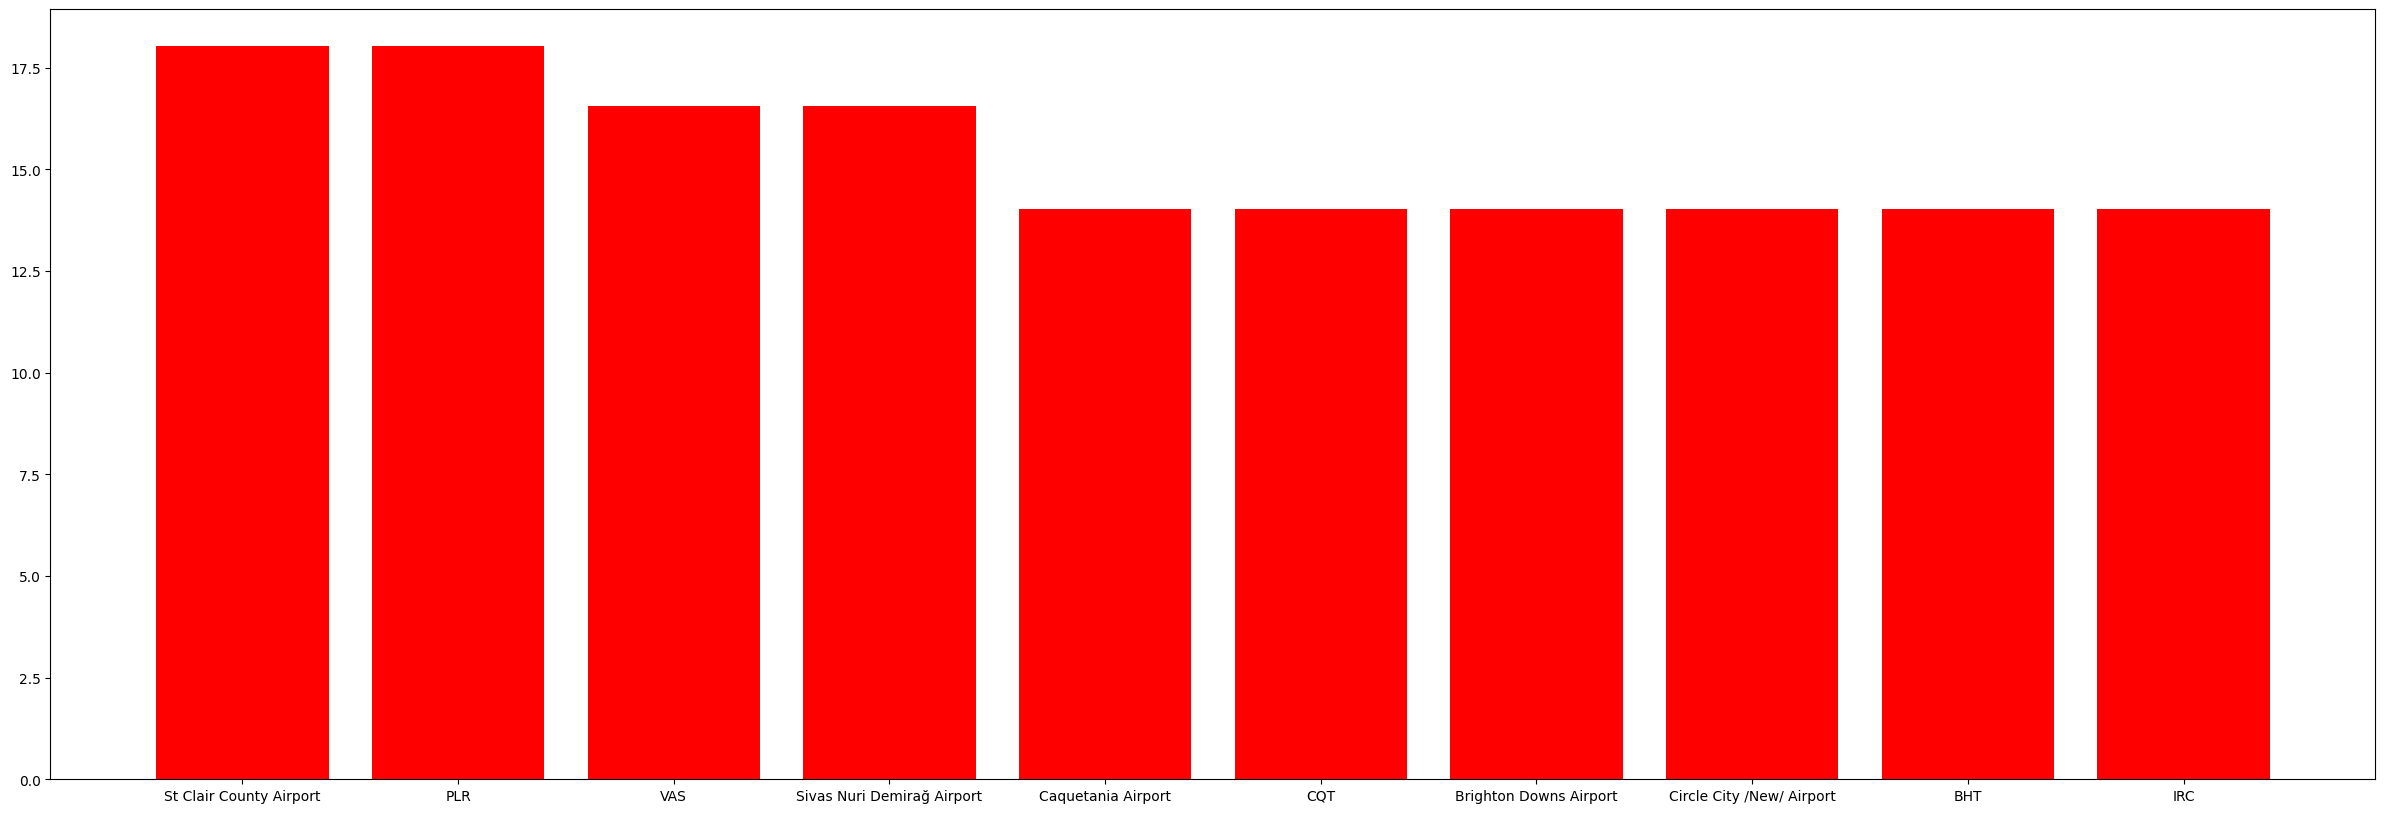

In [19]:
indices = np.argsort(chi2_selector.scores_)[::-1]
features = []
for i in range(10):
    features.append(X.columns[indices[i]])

# Now plot
plt.figure(figsize=(30, 10))
plt.bar(features, chi2_selector.scores_[indices[range(10)]], color='r', align='center')
plt.show()

Gracias al proceso de limpieza de datos, la columna *departure_date* es totalmente manipulable al grado de que se es capaz de filtrar por año, mes e incluso día (no se ejemplifica este último). Por lo que en la siguiente celda se muestra un ejemplo de estos filtros.

c:\Users\spoon\Documents\GitHub\ICD-Portfolio\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\spoon\Documents\GitHub\ICD-Portfolio\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\spoon\Documents\GitHub\ICD-Portfolio\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\spoon\Documents\GitHub\ICD-Portfolio\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

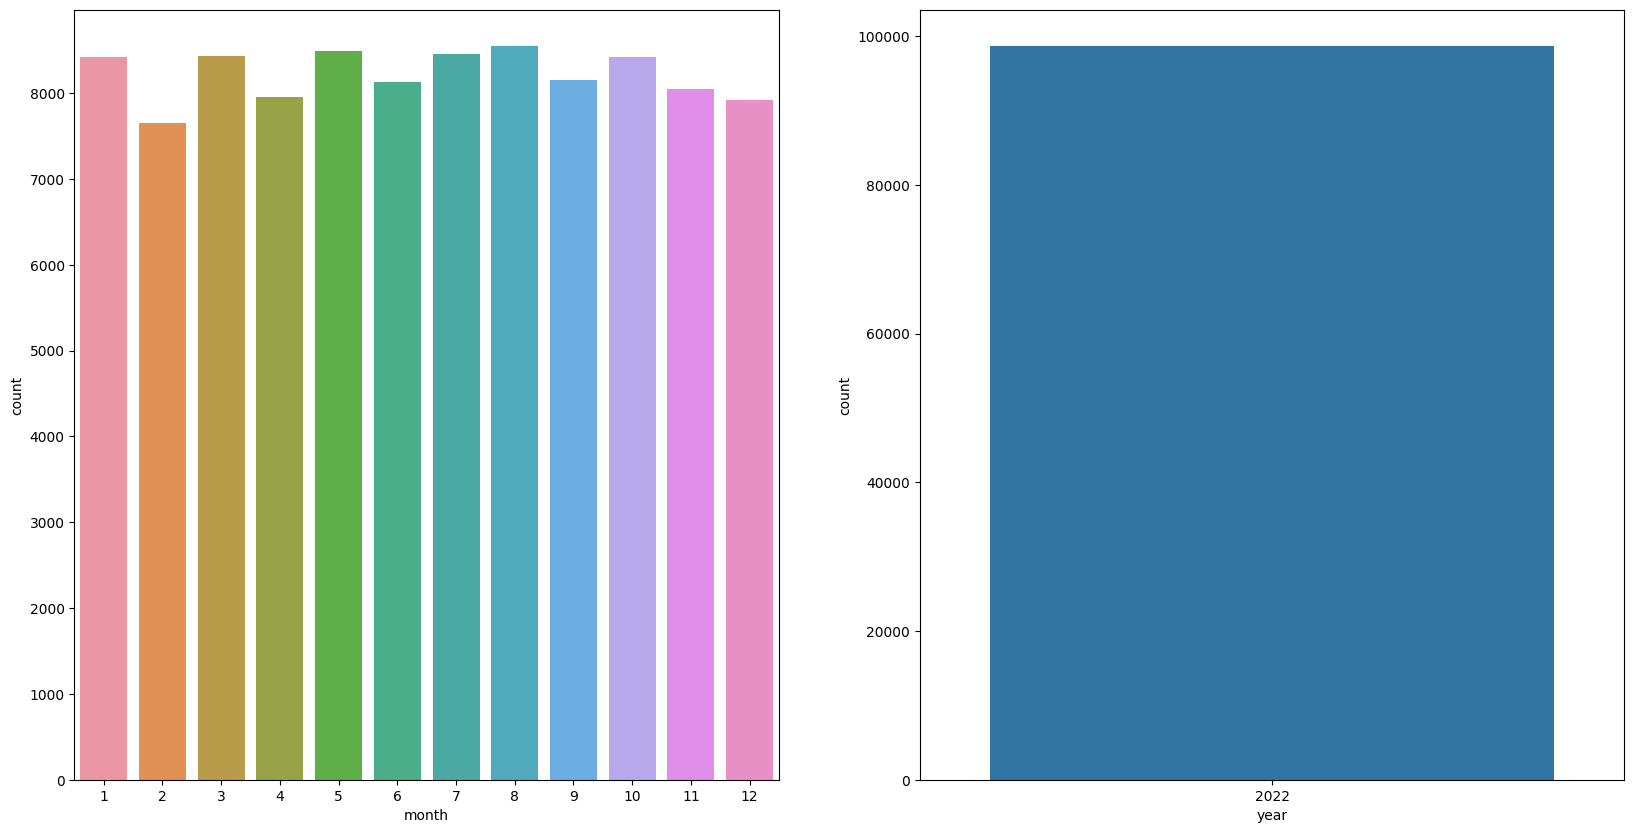

In [20]:
period = pd.DataFrame(df['departure_date'])
period['month'] = pd.DataFrame(pd.DatetimeIndex(df.departure_date).month)
period['year'] = pd.DataFrame(pd.DatetimeIndex(df.departure_date).year)
period['flight_status'] = df['flight_status']

fig, ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(data=period, x="month", ax=ax[0])
sns.countplot(data=period, x="year", ax=ax[1])
plt.show()

## Reducción de dimensionalidad - ¡¡Pendiente!!

In [26]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE

In [ ]:
X_PCA = PCA(n_components=2).fit_transform(X)

scatter = plt.scatter(X_PCA[:,0], X_PCA[:,1], c=y)
plt.title('PCA plot in 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(*scatter.legend_elements())
plt.show()
